# Potato Disease Classification

In [9]:
!pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 96.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 90.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 81.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 84.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 32.3 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Fo

In [1]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.16.1


In [2]:
! pip install kaggle

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
! mkdir ~/.kaggle

In [5]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [6]:

! chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d arjuntejaswi/plant-village

 95% 311M/329M [00:04<00:00, 76.3MB/s]
100% 329M/329M [00:04<00:00, 74.6MB/s]


In [8]:
! unzip plant-village.zip

Streaming output truncated to the last 5000 lines.
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08c033bd-fbc3-445a-88d1-1863070e52ce___YLCV_GCREC 2872.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08dd176c-e9d9-4746-92c3-fa8dc9074347___UF.GRC_YLCV_Lab 03057.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08f78a80-46f5-45a6-937c-4d05d61c08c2___UF.GRC_YLCV_Lab 01895.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0903aa95-6e8a-4abd-a003-126fcd9a5493___YLCV_GCREC 2806.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0911d416-d73d-4c2a-8e45-207a7ceb7c9a___YLCV_GCREC 2773.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/09188838-cc89-4925-94c5-d9563c4cb4bf___UF.GRC_YLCV_Lab 02974.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0922e026-b563-438d-b9ed-7476153023ce___YLCV_GCREC 2258.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Cur

In [9]:
import os
import shutil

# Define the source directory containing all the folders
source_dir = "PlantVillage"

# Define the target directory where you want to copy the selected folders
target_dir = "SelectedFolders"

# Create the target directory if it doesn't exist
if not os.path.exists(target_dir):
    os.makedirs(target_dir)

# List all folders in the source directory
all_folders = os.listdir(source_dir)

# Define the folders you want to select
selected_folders = ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

# Copy the selected folders to the target directory
for folder in selected_folders:
    source_path = os.path.join(source_dir, folder)
    target_path = os.path.join(target_dir, folder)
    if os.path.exists(source_path):
        shutil.copytree(source_path, target_path)
    else:
        print(f"Folder '{folder}' not found in '{source_dir}'.")

print("Selected folders copied successfully.")


Selected folders copied successfully.


In [17]:
!pip install split-folders

In [28]:
import splitfolders

input_folder = "SelectedFolders"
output_folder = "dataset"
split_ratio = (.7, .1, .2)

splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=split_ratio)



Copying files: 2152 files [00:00, 7471.03 files/s]


Dataset credits: https://www.kaggle.com/arjuntejaswi/plant-village

### Import all the Dependencies

In [29]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

### Import data into tensorflow dataset object

Used splitfolders tool to split dataset into training, validation and test directories.

$ pip install split-folders

$ splitfolders --ratio 0.8 0.1 0.1 -- ./training/PlantVillage/


In [11]:
IMAGE_SIZE = 256
CHANNELS = 3

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 1506 images belonging to 3 classes.


In [31]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [32]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [33]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.3107035  0.22050743 0.24403684]
  [0.31131825 0.22112215 0.24465156]
  [0.31193295 0.22173686 0.24526627]
  ...
  [0.6842486  0.60189563 0.6215035 ]
  [0.63447565 0.55212265 0.5717305 ]
  [0.60964227 0.52728933 0.5468972 ]]

 [[0.30888024 0.21868417 0.24221358]
  [0.30826554 0.21806943 0.24159886]
  [0.3076508  0.21745472 0.24098413]
  ...
  [0.68547803 0.6031251  0.62273294]
  [0.6274063  0.54505336 0.5646612 ]
  [0.6108718  0.52851886 0.5481267 ]]

 [[0.32413363 0.23393755 0.25746697]
  [0.3219821  0.23178603 0.25531542]
  [0.31983057 0.2296345  0.2531639 ]
  ...
  [0.6867075  0.60435456 0.6239624 ]
  [0.620337   0.5379841  0.5575919 ]
  [0.6121012  0.52974826 0.5493561 ]]

 ...

 [[0.6901961  0.54901963 0.54901963]
  [0.6866593  0.54548275 0.54548275]
  [0.67276555 0.5315891  0.5315891 ]
  ...
  [0.72156864 0.62352943 0.6392157 ]
  [0.72156864 0.62352943 0.6392157 ]
  [0.72156864 0.62352943 0.6392157 ]]

 [[0.6901961  0.54901963 0.54901963]
  [0.6854298  0.54425335 0.54425335]


In [34]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [35]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 431 images belonging to 3 classes.


In [36]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.650255   0.6495295  0.7033661 ]
  [0.6640079  0.67185104 0.7228314 ]
  [0.6784314  0.6862745  0.7372549 ]
  ...
  [0.75269836 0.7448552  0.7958356 ]
  [0.7517544  0.74391127 0.79489166]
  [0.7508105  0.74296737 0.79394776]]

 [[0.6488391  0.64669776 0.7010063 ]
  [0.66164804 0.6694912  0.7204716 ]
  [0.6784314  0.6862745  0.7372549 ]
  ...
  [0.74500513 0.737162   0.7881424 ]
  [0.7445332  0.73669004 0.7876705 ]
  [0.74406123 0.7362181  0.7871985 ]]

 [[0.64742315 0.64386594 0.6986464 ]
  [0.6592882  0.66713136 0.71811175]
  [0.6784314  0.6862745  0.7372549 ]
  ...
  [0.741241   0.73339784 0.78437823]
  [0.7417129  0.7338698  0.7848502 ]
  [0.74218494 0.7343418  0.7853222 ]]

 ...

 [[0.5401681  0.5166387  0.5636975 ]
  [0.5406401  0.5171107  0.5641695 ]
  [0.54111207 0.51758265 0.5646415 ]
  ...
  [0.5958852  0.5801989  0.6351009 ]
  [0.5195058  0.5038195  0.5587215 ]
  [0.5898496  0.5741633  0.6290653 ]]

 [[0.4777132  0.4541838  0.5012426 ]
  [0.46732986 0.44380045 0.49085927]


## Building the Model

In [37]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [38]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

### Compiling the Model
We use `adam` Optimizer, `SparseCategoricalCrossentropy` for losses, `accuracy` as a metric

In [39]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [40]:
1506/32

47.0625

In [41]:
215/32

6.71875

In [42]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 43s 631ms/step - accuracy: 0.4873 - loss: 0.9493 - val_accuracy: 0.5208 - val_loss: 0.8814
Epoch 2/20
 1/47 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.5000 - loss: 0.7698

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.5000 - loss: 0.7698 - val_accuracy: 0.6087 - val_loss: 0.8629
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 66s 513ms/step - accuracy: 0.6043 - loss: 0.8562 - val_accuracy: 0.6562 - val_loss: 0.7483
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5625 - loss: 1.0022 - val_accuracy: 0.7826 - val_loss: 0.6688
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 27s 523ms/step - accuracy: 0.7368 - loss: 0.5960 - val_accuracy: 0.8385 - val_loss: 0.4712
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9062 - loss: 0.3652 - val_accuracy: 0.7826 - val_loss: 0.5004
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 522ms/step - accuracy: 0.8383 - loss: 0.3910 - val_accuracy: 0.8438 - val_loss: 0.3791
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9688 - loss: 0.2269 - val_accuracy: 0.8696 - val_loss: 0.2667
Epoch 9/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 27s 508ms/step - accuracy: 0.8510 - loss: 0.3458 - val_accuracy: 0.8385 - val_lo

In [43]:
scores = model.evaluate(test_generator)

14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 483ms/step - accuracy: 0.9358 - loss: 0.1682


In [44]:
scores

[0.15404917299747467, 0.9350348114967346]

Scores is just a list containing loss and accuracy value

### Plotting the Accuracy and Loss Curves

In [45]:
history

You can read documentation on history object here: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History

In [46]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [47]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch**

In [48]:
type(history.history['loss'])

list

In [49]:
len(history.history['loss'])

20

In [50]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.9133681654930115,
 0.7697962522506714,
 0.7703085541725159,
 1.0022108554840088,
 0.5425026416778564]

In [51]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [52]:
val_acc

[0.5208333134651184,
 0.6086956262588501,
 0.65625,
 0.782608687877655,
 0.8385416865348816,
 0.782608687877655,
 0.84375,
 0.8695651888847351,
 0.8385416865348816,
 0.9130434989929199,
 0.8958333134651184,
 0.9130434989929199,
 0.8802083134651184,
 0.9130434989929199,
 0.921875,
 0.95652174949646,
 0.875,
 1.0,
 0.921875,
 0.9130434989929199]

In [53]:
acc

[0.49660786986351013,
 0.5,
 0.6614654064178467,
 0.5625,
 0.759158730506897,
 0.90625,
 0.8371777534484863,
 0.96875,
 0.8717774748802185,
 0.90625,
 0.8819538950920105,
 0.96875,
 0.8860244154930115,
 0.90625,
 0.9016281962394714,
 0.96875,
 0.9267299771308899,
 0.875,
 0.9308005571365356,
 0.90625]

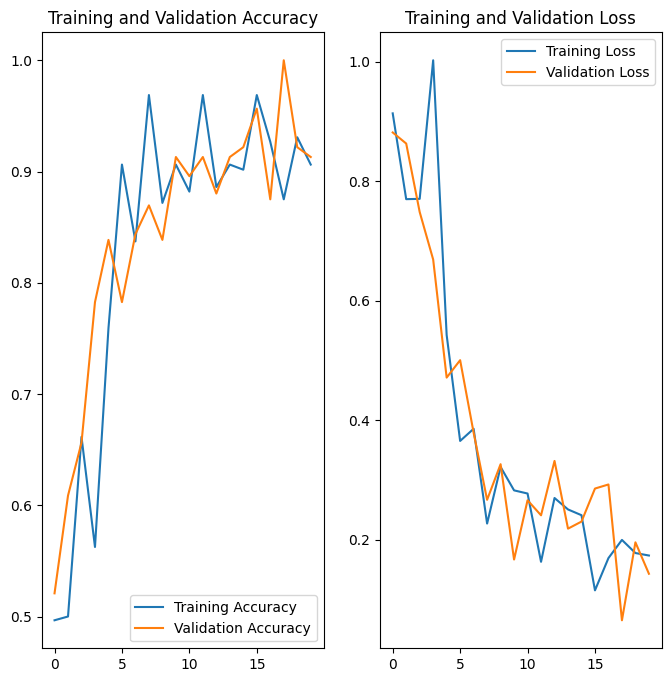

In [54]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Run prediction on a sample image

first image to predict
actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
predicted label: Potato___Early_blight


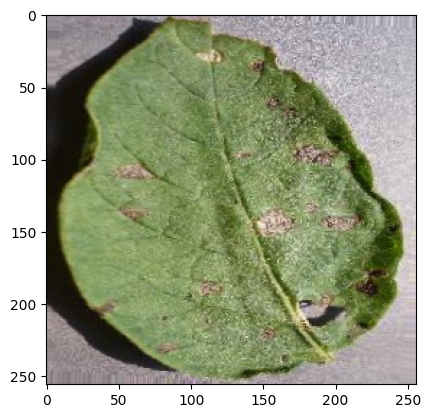

In [58]:
import numpy as np

for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])  # corrected from labels_batch to label_batch

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:", class_names[first_label])

    batch_prediction = model.predict(image_batch)  # corrected from images_batch to image_batch
    print("predicted label:", class_names[np.argmax(batch_prediction[0])])

    break


### Write a function for inference

In [56]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

**Now run inference on few sample images**

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


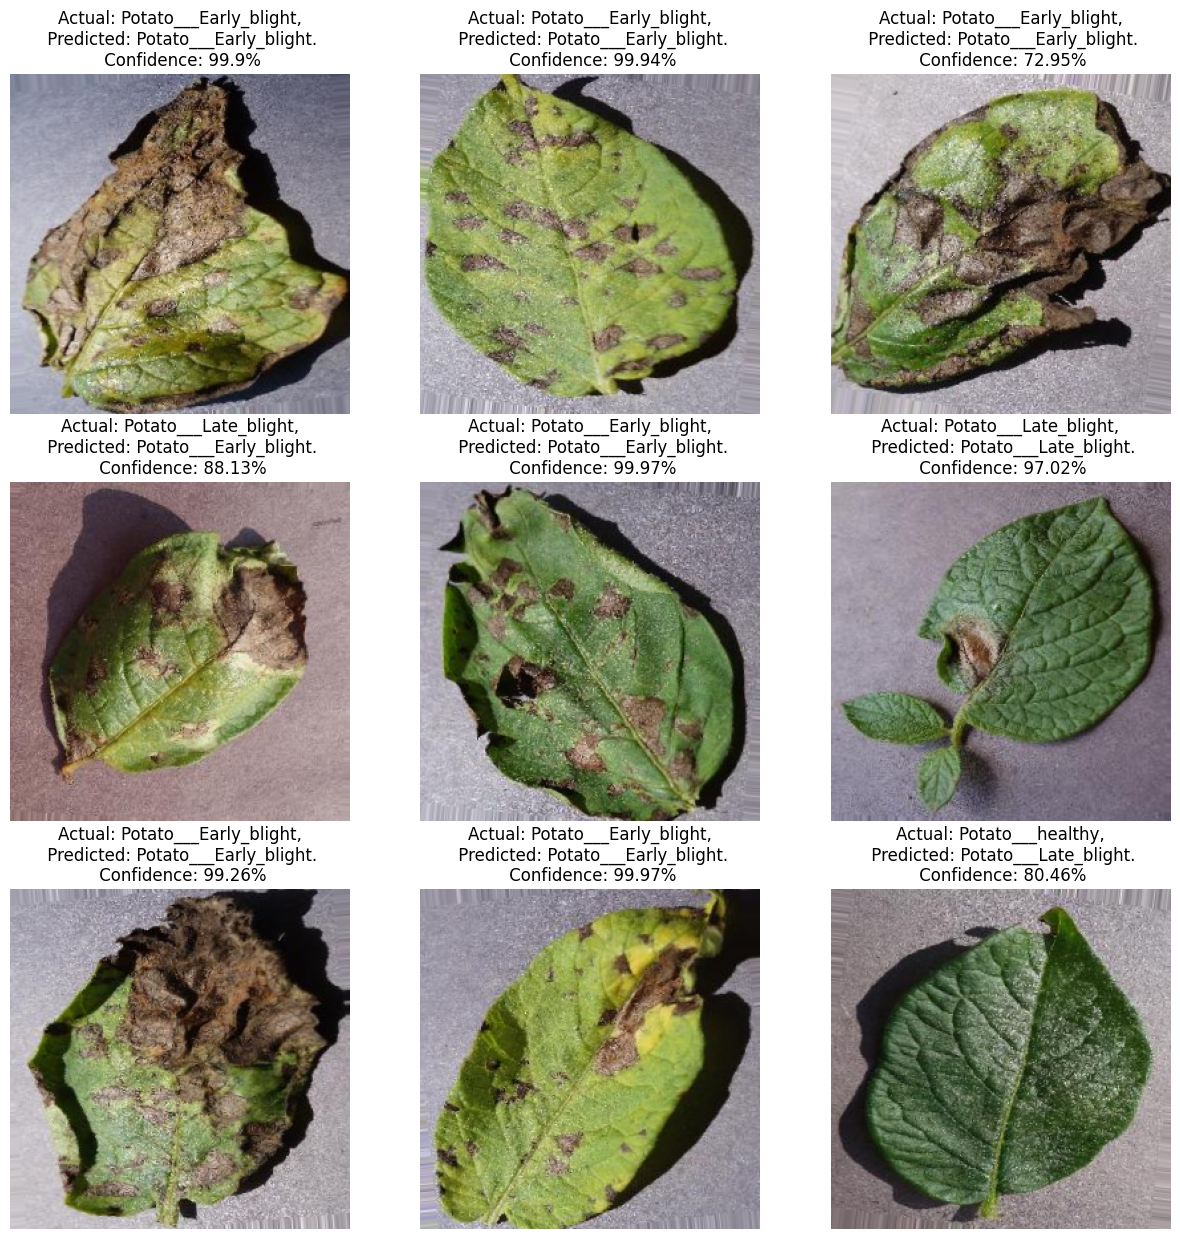

In [59]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")
    break

### Saving the Model

Save model in h5 format so that there is just one file and we can upload that to GCP conveniently

In [60]:
model.save("potatoes.h5")